In [3]:
import geopandas as gpd
import descartes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline

In [4]:
Peninsular_shape = gpd.read_file("Peninsular.shp")
type(Peninsular_shape)
Peninsular_shape

,fid,ST_NM,geometry
0,1.0,Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33380, 81.32692 16..."
1,5.0,Gujarat,"MULTIPOLYGON (((72.67653 21.15570, 72.70319 21..."
2,6.0,Karnataka,"MULTIPOLYGON (((74.30911 15.79856, 74.29779 15..."
3,7.0,Kerala,"POLYGON ((76.43138 11.66633, 76.44222 11.64056..."
4,8.0,Maharashtra,"POLYGON ((80.66342 21.33138, 80.67964 21.31193..."
5,10.0,Tamil Nadu,"MULTIPOLYGON (((78.93930 9.18738, 78.93603 9.1..."
6,11.0,Odisha,"MULTIPOLYGON (((86.38937 19.96351, 86.38051 19..."


Text(0.5, 1.0, 'Indian Peninsular Region')

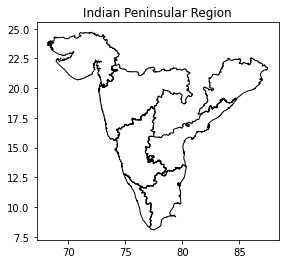

In [5]:
Peninsular_shape.plot(edgecolor='black', facecolor='none')
plt.title('Indian Peninsular Region')

<AxesSubplot:>

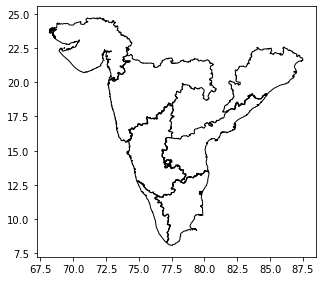

In [6]:
fig,ax = plt.subplots(figsize = (5,5))
Peninsular_shape.plot(ax = ax, edgecolor='black', facecolor='none')

In [8]:
df1 = pd.read_csv("AnnualflowPredicted.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df1

,Mean Annual Flow (m3/s),Predicted Values,Latitude,Longitude
0,8.089800,37.996477,11.1309,76.6861
1,2.219200,37.474923,11.3217,76.8928
2,274.760000,415.044147,21.7678,87.1642
3,510.265851,332.603379,16.0500,74.3500
4,171.590008,157.805829,14.9400,75.6200
5,99.621960,91.882878,13.2900,79.4800
6,285.111041,247.464438,16.5000,74.4700
7,179.946829,194.882332,16.1900,74.7900
8,884.470131,730.295071,20.8800,86.0100
9,1155.533471,1155.533471,16.6800,74.6000


In [9]:
gdf1 = gpd.GeoDataFrame(df1,geometry=gpd.points_from_xy(df1['Longitude'],df1['Latitude']),crs =4326)
gdf1


,Mean Annual Flow (m3/s),Predicted Values,Latitude,Longitude,geometry
0,8.089800,37.996477,11.1309,76.6861,POINT (76.68610 11.13090)
1,2.219200,37.474923,11.3217,76.8928,POINT (76.89280 11.32170)
2,274.760000,415.044147,21.7678,87.1642,POINT (87.16420 21.76780)
3,510.265851,332.603379,16.0500,74.3500,POINT (74.35000 16.05000)
4,171.590008,157.805829,14.9400,75.6200,POINT (75.62000 14.94000)
5,99.621960,91.882878,13.2900,79.4800,POINT (79.48000 13.29000)
6,285.111041,247.464438,16.5000,74.4700,POINT (74.47000 16.50000)
7,179.946829,194.882332,16.1900,74.7900,POINT (74.79000 16.19000)
8,884.470131,730.295071,20.8800,86.0100,POINT (86.01000 20.88000)
9,1155.533471,1155.533471,16.6800,74.6000,POINT (74.60000 16.68000)


Text(45.27141484776591, 0.5, 'Predictions')

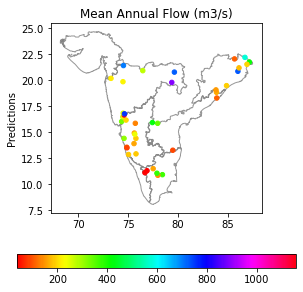

In [40]:
fig,ax = plt.subplots(figsize=(5,5))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
chara = gdf1.plot(ax=ax,column ="Predicted Values", cmap = "hsv",  markersize=20,legend= True,legend_kwds={'orientation':"horizontal"}, figsize=(5,5))
plt.title("Mean Annual Flow (m3/s)")
plt.ylabel("Predictions")


In [15]:
df2 = pd.read_csv("monsoonflowPredicted.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df2

,Unnamed: 0,Real Values,Predicted Values,Latitude,Longitude
0,0,11.945100,69.792985,11.1309,76.6861
1,1,1.656000,64.956565,11.3217,76.8928
2,2,677.006000,689.152475,21.7678,87.1642
3,3,544.160319,365.504422,16.0500,74.3500
4,4,206.518865,206.105890,14.9400,75.6200
5,5,138.724445,115.341506,13.2900,79.4800
6,6,303.776635,304.041253,16.5000,74.4700
7,7,215.481796,244.298807,16.1900,74.7900
8,8,1231.582982,1124.904863,20.8800,86.0100
9,9,1254.719695,1254.719695,16.6800,74.6000


In [21]:
gdf2 = gpd.GeoDataFrame(df2,geometry=gpd.points_from_xy(df2['Longitude'],df2['Latitude']),crs =4326)
gdf2

,Unnamed: 0,Real Values,Predicted Values,Latitude,Longitude,geometry
0,0,11.945100,69.792985,11.1309,76.6861,POINT (76.68610 11.13090)
1,1,1.656000,64.956565,11.3217,76.8928,POINT (76.89280 11.32170)
2,2,677.006000,689.152475,21.7678,87.1642,POINT (87.16420 21.76780)
3,3,544.160319,365.504422,16.0500,74.3500,POINT (74.35000 16.05000)
4,4,206.518865,206.105890,14.9400,75.6200,POINT (75.62000 14.94000)
5,5,138.724445,115.341506,13.2900,79.4800,POINT (79.48000 13.29000)
6,6,303.776635,304.041253,16.5000,74.4700,POINT (74.47000 16.50000)
7,7,215.481796,244.298807,16.1900,74.7900,POINT (74.79000 16.19000)
8,8,1231.582982,1124.904863,20.8800,86.0100,POINT (86.01000 20.88000)
9,9,1254.719695,1254.719695,16.6800,74.6000,POINT (74.60000 16.68000)


Text(45.27141484776591, 0.5, 'Predictions')

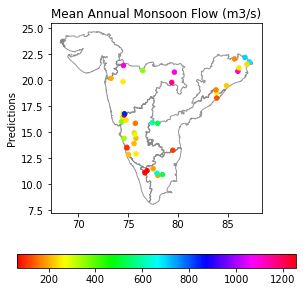

In [39]:
fig,ax = plt.subplots(figsize=(5,5))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
chara = gdf2.plot(ax=ax,column ="Predicted Values", cmap = "hsv",  markersize=20,legend= True,legend_kwds={'orientation':"horizontal"}, figsize=(5,5))
plt.title("Mean Annual Monsoon Flow (m3/s)")
plt.ylabel("Predictions")


In [28]:
df3 = pd.read_csv("highflowPredicted.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df3

,Unnamed: 0,Real Values,Predicted Values,Latitude,Longitude
0,0,133.2700,166.879250,11.1309,76.6861
1,1,20.0700,103.204250,11.3217,76.8928
2,2,1372.3735,1892.732250,21.7678,87.1642
3,3,1650.0000,994.648344,16.0500,74.3500
4,4,579.7650,618.357719,14.9400,75.6200
5,5,319.5185,576.747594,13.2900,79.4800
6,6,949.2500,923.348438,16.5000,74.4700
7,7,803.7700,751.785000,16.1900,74.7900
8,8,3099.5000,2599.816500,20.8800,86.0100
9,9,4086.4800,4086.480000,16.6800,74.6000


In [29]:
gdf3 = gpd.GeoDataFrame(df3,geometry=gpd.points_from_xy(df3['Longitude'],df3['Latitude']),crs =4326)
gdf3

,Unnamed: 0,Real Values,Predicted Values,Latitude,Longitude,geometry
0,0,133.2700,166.879250,11.1309,76.6861,POINT (76.68610 11.13090)
1,1,20.0700,103.204250,11.3217,76.8928,POINT (76.89280 11.32170)
2,2,1372.3735,1892.732250,21.7678,87.1642,POINT (87.16420 21.76780)
3,3,1650.0000,994.648344,16.0500,74.3500,POINT (74.35000 16.05000)
4,4,579.7650,618.357719,14.9400,75.6200,POINT (75.62000 14.94000)
5,5,319.5185,576.747594,13.2900,79.4800,POINT (79.48000 13.29000)
6,6,949.2500,923.348438,16.5000,74.4700,POINT (74.47000 16.50000)
7,7,803.7700,751.785000,16.1900,74.7900,POINT (74.79000 16.19000)
8,8,3099.5000,2599.816500,20.8800,86.0100,POINT (86.01000 20.88000)
9,9,4086.4800,4086.480000,16.6800,74.6000,POINT (74.60000 16.68000)


Text(45.27141484776591, 0.5, 'Predictions')

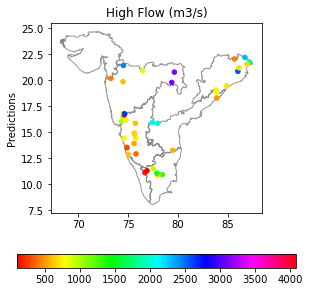

In [41]:
fig,ax = plt.subplots(figsize=(5,5))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
chara = gdf3.plot(ax=ax,column ="Predicted Values", cmap = "hsv", markersize=20, legend= True,legend_kwds={'orientation':"horizontal"}, figsize=(5,5))
plt.title("High Flow (m3/s)")
plt.ylabel("Predictions")

In [31]:
df4 = pd.read_csv("SlopeofFDCPredicted.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df4

,Slope of FDC,Predicted Values,Latitude,Longitude
0,1.827450,2.490830,11.1309,76.6861
1,5.978000,4.048961,11.3217,76.8928
2,5.678000,5.535652,21.7678,87.1642
3,3.204780,3.193193,16.0500,74.3500
4,3.678942,5.058452,14.9400,75.6200
5,4.600424,4.406178,13.2900,79.4800
6,3.070795,3.363616,16.5000,74.4700
7,5.693498,5.599243,16.1900,74.7900
8,3.923497,4.443538,20.8800,86.0100
9,3.245973,3.555579,16.6800,74.6000


In [32]:
gdf4 = gpd.GeoDataFrame(df4,geometry=gpd.points_from_xy(df4['Longitude'],df4['Latitude']),crs =4326)
gdf4

,Slope of FDC,Predicted Values,Latitude,Longitude,geometry
0,1.827450,2.490830,11.1309,76.6861,POINT (76.68610 11.13090)
1,5.978000,4.048961,11.3217,76.8928,POINT (76.89280 11.32170)
2,5.678000,5.535652,21.7678,87.1642,POINT (87.16420 21.76780)
3,3.204780,3.193193,16.0500,74.3500,POINT (74.35000 16.05000)
4,3.678942,5.058452,14.9400,75.6200,POINT (75.62000 14.94000)
5,4.600424,4.406178,13.2900,79.4800,POINT (79.48000 13.29000)
6,3.070795,3.363616,16.5000,74.4700,POINT (74.47000 16.50000)
7,5.693498,5.599243,16.1900,74.7900,POINT (74.79000 16.19000)
8,3.923497,4.443538,20.8800,86.0100,POINT (86.01000 20.88000)
9,3.245973,3.555579,16.6800,74.6000,POINT (74.60000 16.68000)


Text(45.27141484776591, 0.5, 'Predictions')

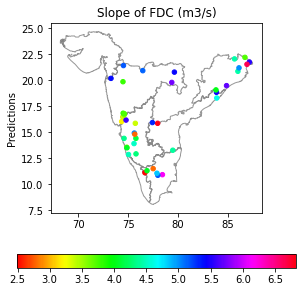

In [42]:
fig,ax = plt.subplots(figsize=(5,5))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
chara = gdf4.plot(ax=ax,column ="Predicted Values", cmap = "hsv", markersize=20, legend= True,legend_kwds={'orientation':"horizontal"}, figsize=(5,5))
plt.title("Slope of FDC (m3/s)")
plt.ylabel("Predictions")